In [16]:
# 한글, 음수 시각화 설정

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    
#시각화에서 음수를 표현하기 위한 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False 

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [9]:
origin_main_process_df = pd.read_csv('../../data/main_process_df.csv', index_col= 0)
origin_main_process_df.head()

target_df = pd.read_csv('../../data/prp_factory_glass_2016.csv', index_col = 0)
target_df = target_df['L.RD']
target_df.head()

dat...date.name.
2016-01-01 07    0.025
2016-01-01 08    0.000
2016-01-01 09    0.016
2016-01-01 10    0.000
2016-01-01 11    0.000
Name: L.RD, dtype: float64

> ### 주요 공정 이상치 확인

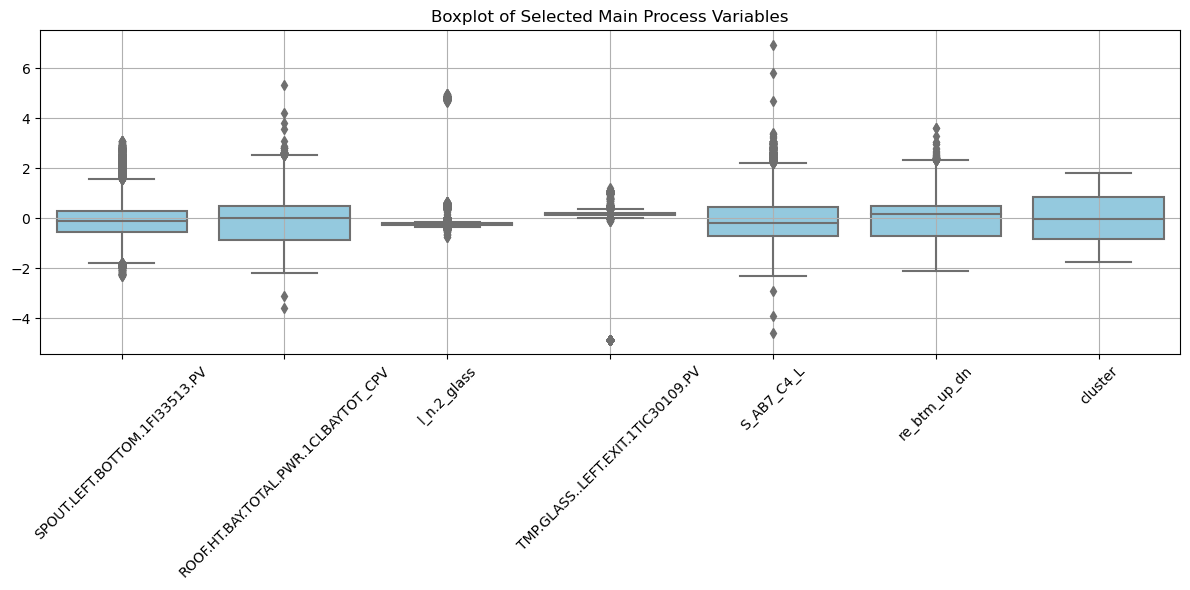

In [10]:
plt.figure(figsize=(12, 6))  # 가로 넓게
sns.boxplot(data=origin_main_process_df, orient='v', color='skyblue')

plt.xticks(rotation=45)
plt.title('Boxplot of Selected Main Process Variables')
plt.grid(True)
plt.tight_layout()
plt.show()

> ### cluster 정수화

In [11]:
len(origin_main_process_df['cluster'].value_counts()) # 153개?
origin_main_process_df['cluster'].describe()

count    8145.000000
mean       -0.001554
std         0.999022
min        -1.747928
25%        -0.840522
50%        -0.026184
75%         0.857955
max         1.788628
Name: cluster, dtype: float64

In [12]:
origin_main_process_target_df = pd.concat([origin_main_process_df, target_df], axis= 1)
origin_main_process_target_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8145 entries, 2016-01-01 07 to 2016-12-31 23
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SPOUT.LEFT.BOTTOM.1FI33513.PV        8145 non-null   float64
 1   ROOF.HT.BAY.TOTAL.PWR.1CLBAYTOT_CPV  8145 non-null   float64
 2   l_n.2_glass                          8145 non-null   float64
 3   TMP.GLASS..LEFT.EXIT.1TIC30109.PV    8145 non-null   float64
 4   S_AB7_C4_L                           8145 non-null   float64
 5   re_btm_up_dn                         8145 non-null   float64
 6   cluster                              8145 non-null   float64
 7   L.RD                                 8142 non-null   float64
dtypes: float64(8)
memory usage: 572.7+ KB


In [13]:
origin_main_process_target_df['cluster_to_int'] = origin_main_process_target_df['cluster'].astype(int)
origin_main_process_target_df['cluster_to_int'].value_counts()

cluster_to_int
 0    4800
 1    1713
-1    1632
Name: count, dtype: int64

In [14]:
origin_main_process_target_df['cluster_round_int'] = origin_main_process_target_df['cluster'].round().astype(int)
origin_main_process_target_df['cluster_round_int'].value_counts()


cluster_round_int
-1    2400
 0    2352
 1    2256
 2     609
-2     528
Name: count, dtype: int64

> ### 클러스터별 타겟 평균 확인

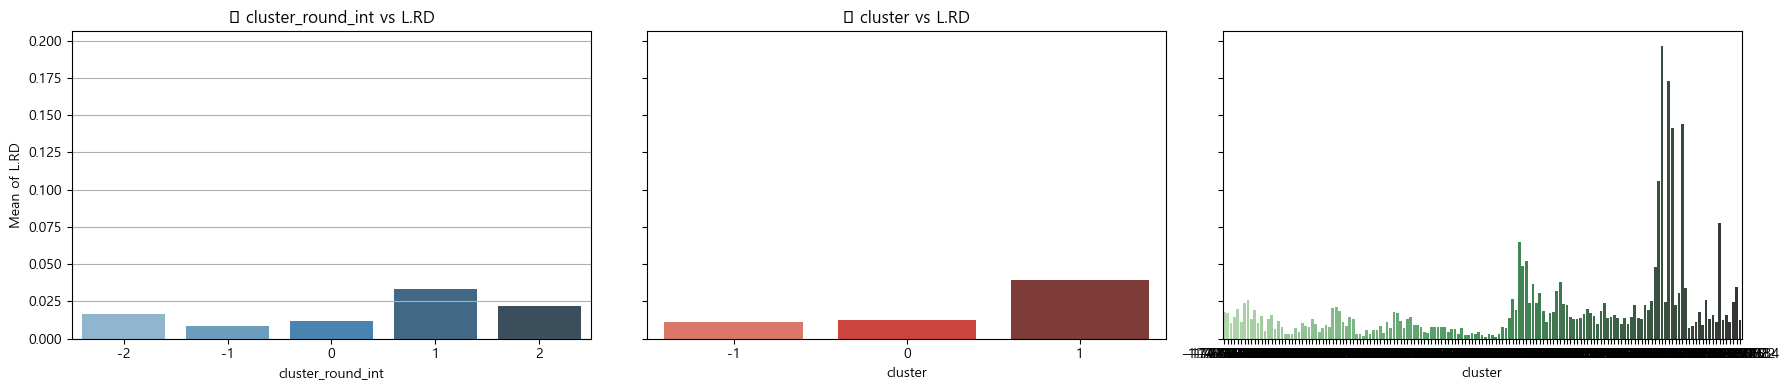

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col = 'L.RD'

# 첫 번째: 반올림 정수 클러스터
cluster1 = 'cluster_round_int'
mean1 = origin_main_process_target_df.groupby(cluster1)[target_col].mean()

# 두 번째: 버림 정수 클러스터 (예시: cluster_int)
cluster2 = 'cluster_to_int'
mean2 = origin_main_process_target_df.groupby(cluster2)[target_col].mean()


# 두 번째: 버림 정수 클러스터 (예시: cluster_int)
cluster3 = 'cluster'
mean3 = origin_main_process_target_df.groupby(cluster3)[target_col].mean()

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 4), sharey=True)

# cluster_round_int 시각화
sns.barplot(x=mean1.index, y=mean1.values, ax=axes[0], palette='Blues_d')
axes[0].set_title('📊 cluster_round_int vs L.RD')
axes[0].set_xlabel('cluster_round_int')
axes[0].set_ylabel(f'Mean of {target_col}')
axes[0].grid(True, axis='y')

# cluster_int 시각화
sns.barplot(x=mean2.index, y=mean2.values, ax=axes[1], palette='Reds_d')
axes[1].set_title('📊 cluster_int vs L.RD')
axes[1].set_xlabel('cluster_int')
axes[1].set_ylabel('')

sns.barplot(x=mean3.index, y=mean3.values, ax=axes[2], palette='Greens_d')
axes[1].set_title('📊 cluster vs L.RD')
axes[1].set_xlabel('cluster')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

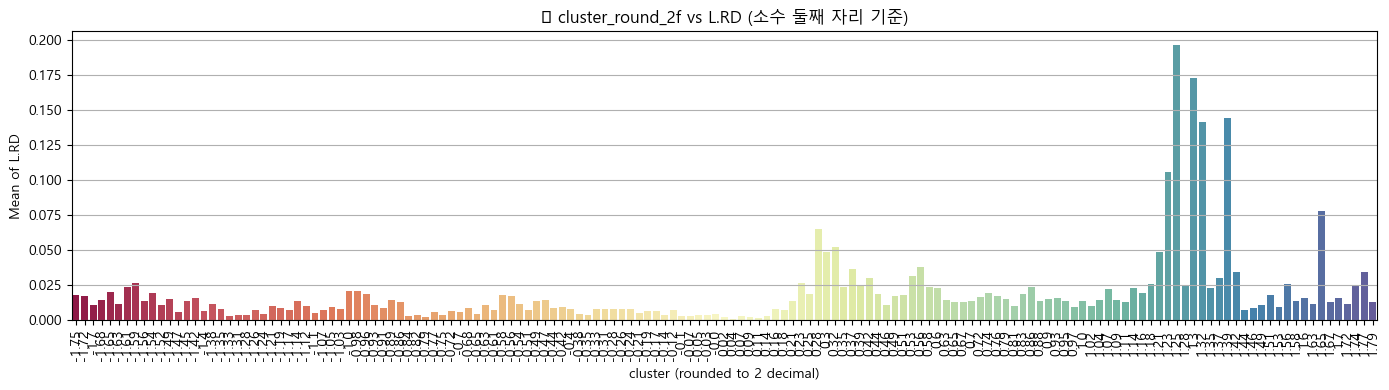

In [20]:
origin_main_process_target_df['cluster_round_2f'] = origin_main_process_target_df['cluster'].round(2)

target_col = 'L.RD'
cluster_col = 'cluster_round_2f'

cluster_mean = origin_main_process_target_df.groupby(cluster_col)[target_col].mean()

plt.figure(figsize=(14, 4))
sns.barplot(x=cluster_mean.index, y=cluster_mean.values, palette='Spectral')
plt.title('📊 cluster_round_2f vs L.RD (소수 둘째 자리 기준)')
plt.xlabel('cluster (rounded to 2 decimal)')
plt.ylabel(f'Mean of {target_col}')
plt.xticks(rotation=90)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [42]:
# 예: 1.2 이상을 고위험 구간으로 설정
high_risk_cluster = (origin_main_process_target_df['cluster_round_2f'] <= 1.4) | (origin_main_process_target_df['cluster_round_2f'] >= 1.2)
high_risk_cluster_df = origin_main_process_target_df[high_risk_cluster]
high_risk_cluster_df.info()

high_risk_cluster_df.index = pd.to_datetime(high_risk_cluster_df.index)

<class 'pandas.core.frame.DataFrame'>
Index: 8145 entries, 2016-01-01 07 to 2016-12-31 23
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SPOUT.LEFT.BOTTOM.1FI33513.PV        8145 non-null   float64
 1   ROOF.HT.BAY.TOTAL.PWR.1CLBAYTOT_CPV  8145 non-null   float64
 2   l_n.2_glass                          8145 non-null   float64
 3   TMP.GLASS..LEFT.EXIT.1TIC30109.PV    8145 non-null   float64
 4   S_AB7_C4_L                           8145 non-null   float64
 5   re_btm_up_dn                         8145 non-null   float64
 6   cluster                              8145 non-null   float64
 7   L.RD                                 8142 non-null   float64
 8   cluster_to_int                       8145 non-null   int32  
 9   cluster_round_int                    8145 non-null   int32  
 10  cluster_round_1f                     8145 non-null   float64
 11  cluster_round_

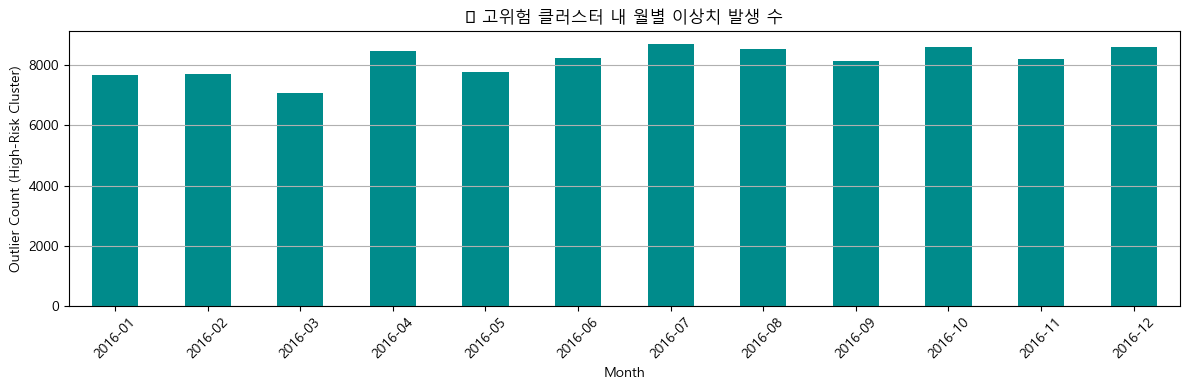

In [43]:
monthly_counts = high_risk_cluster_df.notna().groupby(high_risk_cluster_df.index.to_period('M')).sum()
monthly_counts['total'] = monthly_counts.sum(axis=1)

plt.figure(figsize=(12, 4))
monthly_counts['total'].plot(kind='bar', color='darkcyan')
plt.title('📆 고위험 클러스터 내 월별 이상치 발생 수')
plt.xlabel('Month')
plt.ylabel('Outlier Count (High-Risk Cluster)')
plt.grid(True, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 설비 피로 누적 가능성(12월)

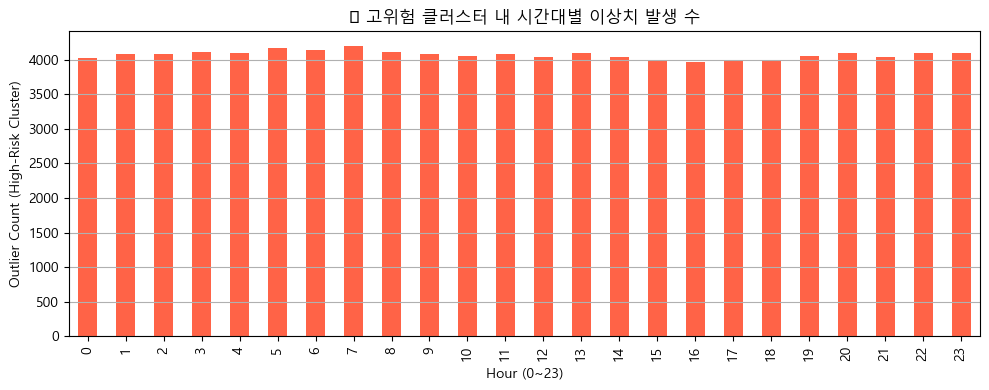

In [44]:
hour_counts_hr = high_risk_cluster_df.notna().groupby(high_risk_cluster_df.index.hour).sum()
hour_counts_hr['total'] = hour_counts_hr.sum(axis=1)

plt.figure(figsize=(10, 4))
hour_counts_hr['total'].plot(kind='bar', color='tomato')
plt.title('⏰ 고위험 클러스터 내 시간대별 이상치 발생 수')
plt.xlabel('Hour (0~23)')
plt.ylabel('Outlier Count (High-Risk Cluster)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

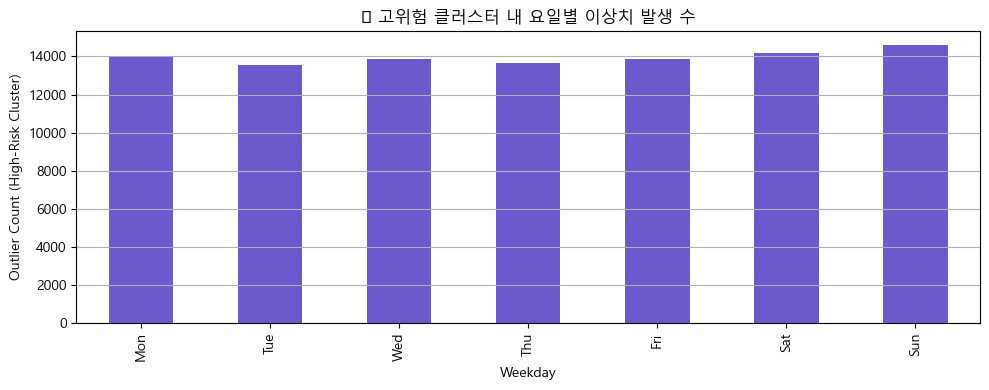

In [45]:
# 3. 요일 추출 (인덱스 타입 보장)
weekday_series = pd.to_datetime(high_risk_cluster_df.index).weekday
weekday_labels = pd.Series(weekday_series).map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'})

# 4. 요일별 이상치 수 계산
# 전체 이상치 개수 기준 (합산)
weekday_outlier_total = high_risk_cluster_df.notna()
weekday_outlier_total['weekday'] = weekday_labels.values

# groupby
weekday_counts = weekday_outlier_total.groupby('weekday').sum(numeric_only=True)
weekday_counts['total'] = weekday_counts.sum(axis=1)
weekday_counts = weekday_counts.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# 5. 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
weekday_counts['total'].plot(kind='bar', color='slateblue')
plt.title('📅 고위험 클러스터 내 요일별 이상치 발생 수')
plt.xlabel('Weekday')
plt.ylabel('Outlier Count (High-Risk Cluster)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [21]:
origin_main_process_df.drop('cluster', axis= 1, inplace= True)
origin_main_process_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8145 entries, 2016-01-01 07 to 2016-12-31 23
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   SPOUT.LEFT.BOTTOM.1FI33513.PV        8145 non-null   float64
 1   ROOF.HT.BAY.TOTAL.PWR.1CLBAYTOT_CPV  8145 non-null   float64
 2   l_n.2_glass                          8145 non-null   float64
 3   TMP.GLASS..LEFT.EXIT.1TIC30109.PV    8145 non-null   float64
 4   S_AB7_C4_L                           8145 non-null   float64
 5   re_btm_up_dn                         8145 non-null   float64
dtypes: float64(6)
memory usage: 445.4+ KB


In [22]:
outlier_dict = {}

for col in origin_main_process_df.columns:
    series = origin_main_process_df[col]
    
    # IQR 계산
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 추출
    outlier_series = series[(series < lower_bound) | (series > upper_bound)]
    
    # 딕셔너리에 저장
    outlier_dict[col] = outlier_series

# 여러 Series를 열 기준으로 병합
outlier_df = pd.concat(outlier_dict, axis=1)

# 결과 확인
outlier_df.head()

,SPOUT.LEFT.BOTTOM.1FI33513.PV,ROOF.HT.BAY.TOTAL.PWR.1CLBAYTOT_CPV,l_n.2_glass,TMP.GLASS..LEFT.EXIT.1TIC30109.PV,S_AB7_C4_L,re_btm_up_dn
dat...date.name.,,,,,,
2016-01-08 07,-1.787596,NaN,4.817951,-4.846904,NaN,NaN
2016-01-08 08,-1.802004,NaN,4.815229,-4.846904,NaN,NaN
2016-01-08 09,-1.812942,NaN,4.812858,-4.846904,NaN,NaN
2016-01-09 08,-1.790901,NaN,4.805974,-4.846904,2.214760,NaN
2016-01-09 09,-1.789822,NaN,4.805817,-4.846904,2.223059,NaN


In [23]:
outlier_df.index = pd.to_datetime(outlier_df.index)

> ### 월별 이상치 발생

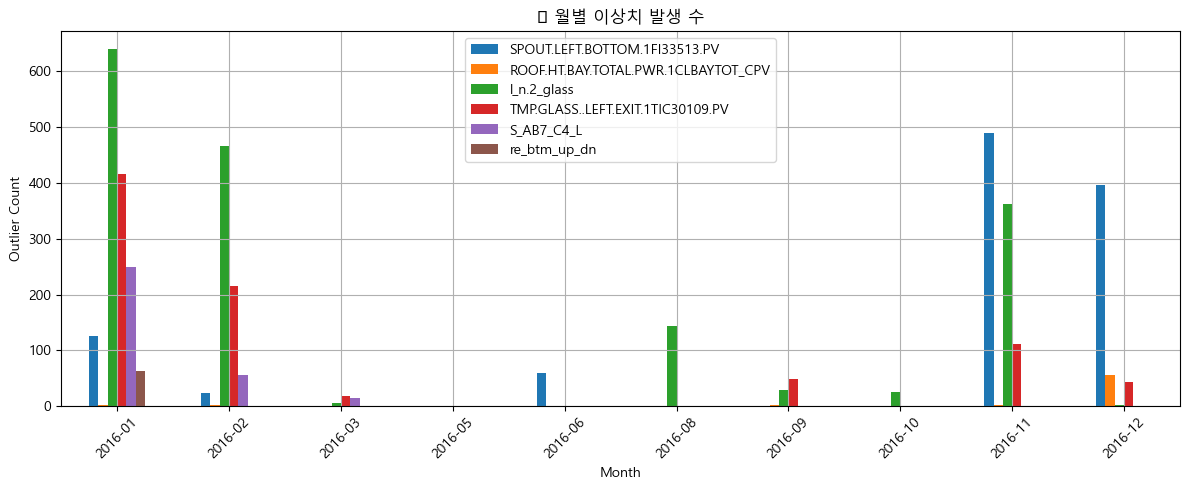

In [ ]:
monthly_counts = outlier_df.notna().groupby(outlier_df.index.to_period('M')).sum()

# 시각화
monthly_counts.plot(kind='bar', figsize=(12, 5), title='📆 월별 이상치 발생 수')
plt.xlabel('Month')
plt.ylabel('Outlier Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 연말 생산 급증?
# 공정 설비 기반 원인 분석 필요
# glass 공정이 1,2월에 문제가 발생하는 것으로 보임

- 2016-01~02, 11~12 : 겨울에 이상치 발생이 늘어남
- 5월은 관리가 잘된 월

> ### 요일별 이상치 발생 수

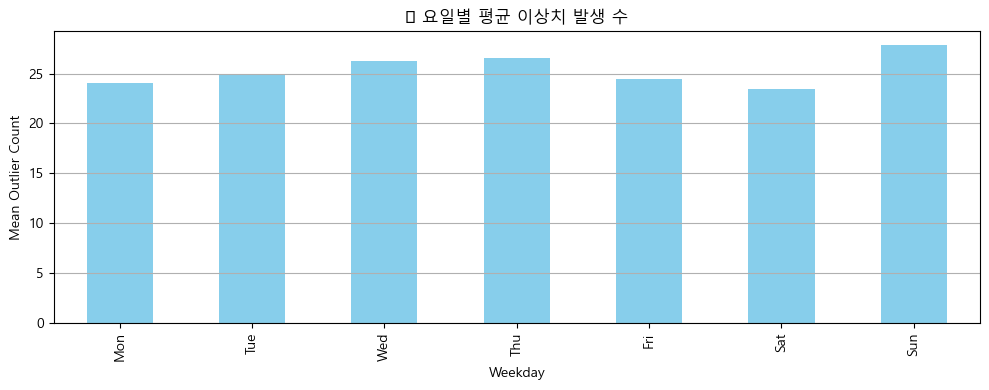

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# 요일 이름 매핑 (0=월요일 ~ 6=일요일)
weekday_map = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

# 날짜별 이상치 수 계산
date_counts = outlier_df.notna().groupby(outlier_df.index.date).sum()
date_counts['total'] = date_counts.sum(axis=1)  # 전체 이상치 개수 합계

# 요일별로 변환
weekday_counts = pd.Series(date_counts.index).apply(lambda d: pd.Timestamp(d).weekday()).map(weekday_map)
date_counts['weekday'] = weekday_counts.values

# 요일별 평균 이상치 수 계산
weekday_mean = date_counts.groupby('weekday')['total'].mean().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# 시각화
plt.figure(figsize=(10, 4))
weekday_mean.plot(kind='bar', color='skyblue')
plt.title('📅 요일별 평균 이상치 발생 수')
plt.ylabel('Mean Outlier Count')
plt.xlabel('Weekday')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

> ### 시간대별 이상치

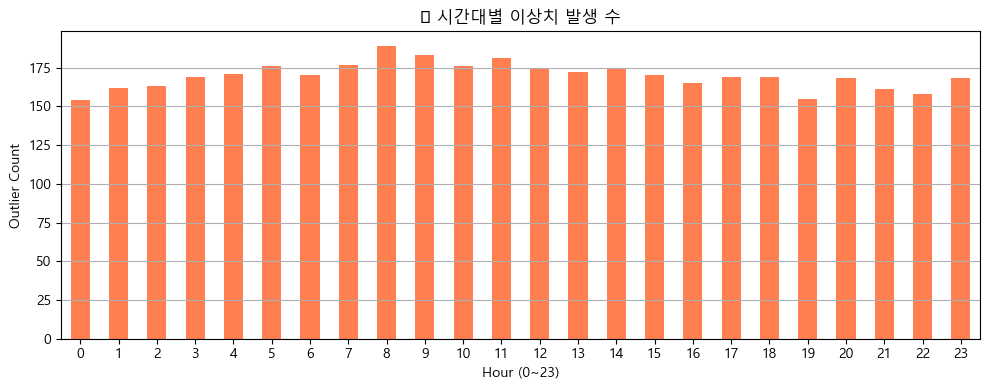

In [27]:
import matplotlib.pyplot as plt

# 시간대별 이상치 수 계산
# (NaN이 아닌 값이 이상치라고 가정하고 있음)
hour_counts = outlier_df.notna().groupby(outlier_df.index.hour).sum()
hour_counts['total'] = hour_counts.sum(axis=1)  # 전체 이상치 개수 합계

# 시각화
plt.figure(figsize=(10, 4))
hour_counts['total'].plot(kind='bar', color='coral')
plt.title('⏰ 시간대별 이상치 발생 수')
plt.xlabel('Hour (0~23)')
plt.ylabel('Outlier Count')
plt.grid(True, axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()